In [1]:
from sys import path

path +=['..']

from mylib import drivers as dr
import cv2
import ipywidgets
from mylib import Motor
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import os
import asyncio

In [2]:
%matplotlib notebook

In [3]:
resolution = 1920, 1080

resolution = 4608, 3456

In [4]:
print(dr.motor.list_available_devices())
motM = dr.motor(90113195)
motorM = Motor(motM, 'motor', blocking=False)

[(13, 90113195), (13, 90113196), (13, 90113197)]


In [5]:
motorM.blocking = True

In [6]:
cam = cv2.VideoCapture(1)

In [7]:
cam.set(cv2.CAP_PROP_FRAME_WIDTH, resolution[0])
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, resolution[1])
cam.set(cv2.CAP_PROP_EXPOSURE, -5)

True

for a in range(12, 53, 3):
    motM.move_to(a, blocking=True)
    pygame.image.save(cam.get_image(), f'testPic/a{a}.jpg')

<IPython.core.display.Javascript object>


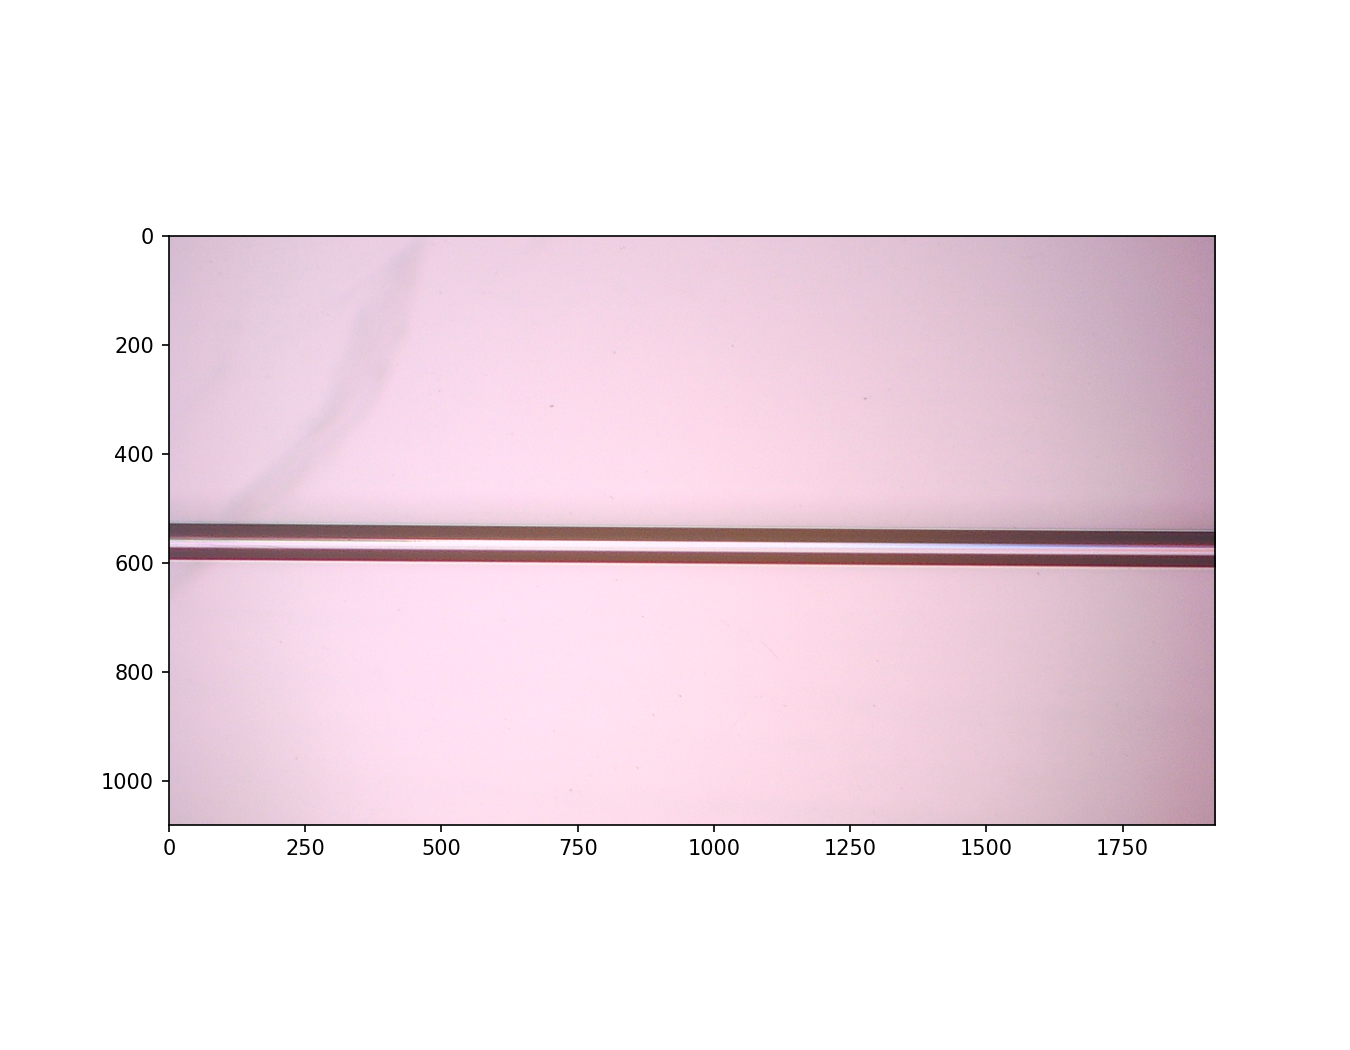

GridspecLayout(children=(GridspecLayout(children=(Button(description='Backwards', layout=Layout(grid_area='wid…

In [8]:
fig, ax = plt.subplots(figsize=(9, 7))
def takeAndShow():
    result, image = cam.read()
    ax.clear()
    ax.imshow(image)
    fig.canvas.draw()
    return image

def moveForw(btn=None, flag=None):
    asyncio.run(motorM.Move(.5))
    takeAndShow();
async def moveBack(btn=None, flag=None):
    asyncio.run(motorM.Move(-.5))
    takeAndShow();
async def moveNext(btn=None, flag=None):
    asyncio.run(motorM.Move(.5))
    cv2.imwrite(f'testPic/im{motorM.Getposition()}.jpg', takeAndShow())

buttonBack = ipywidgets.widgets.Button(description='Backwards')
buttonForw = ipywidgets.widgets.Button(description='Forwards')
buttonNext = ipywidgets.widgets.Button(description='Next')

buttonBack.on_click(moveBack)
buttonForw.on_click(moveForw)
buttonNext.on_click(moveNext)

grid0 = ipywidgets.GridspecLayout(2, 1)
grid = ipywidgets.GridspecLayout(1, 3)
grid[0, 0] = buttonBack
grid[0, 1] = buttonForw
grid[0, 2] = buttonNext
grid0[0, 0] = grid
display(grid0)

takeAndShow();

In [9]:
startPos = 0
endPos = 39.5

In [10]:
num = 1095

In [11]:
os.mkdir(f'testPic/{num}')
os.mkdir(f'testPic/res/{num}')

In [12]:
for i in np.arange(startPos, endPos + .5, .5):
    await motorM.MoveTo(i)
    cv2.imwrite(f'testPic/{num}/im{num}_{i}.jpg', takeAndShow())

Перемещение на начальную позицию перед выключением:

In [13]:
await motorM.MoveTo(0)

0